In [8]:
import requests # REST API (representational state transfer)
import pandas as pd
import io
import matplotlib.pyplot as plt
import smopy
import matplotlib.patheffects as pe

In [4]:
sensors_url = "http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/"

sensor_params = dict(
    theme = 'Vehicles',
    last_n_records = '1000'
)

In [7]:
r = requests.get(sensors_url)
print(r.status_code)
sensors_df = pd.read_csv(io.StringIO(r.content.decode('utf-8')))
sensors_df = sensors_df[sensors_df['NE Travel Data API']]

200


In [32]:
sensors_df

Sensor Name  \
0                      PER_ENVIRONMENT_EA_023044   
1                                 PER_EMOTE_1704   
2     PER_BUILDING_OAT_ROBINSON_LIBRAY_TREND_MOM   
3                          PER_AIRMON_MESH305245   
4                     PER_WUNDERGROUND_ISHOTLEY4   
...                                          ...   
1734                                PER_BEE_9848   
1735                              PER_EMOTE_1310   
1736                       PER_CARPARK_MANORS_CP   
1737                              PER_EMOTE_1006   
1738                      PER_AIRMON_MESH1962150   

                         Location (WKT)      GHAMSL  \
0           POINT (-1.812313 54.905964)   53.139999   
1     POINT (-1.622359135 54.971435572)   50.580002   
2             POINT (-1.61127 54.98107)   51.889999   
3           POINT (-1.577439 55.005077)   61.580002   
4           POINT (-1.940469 54.854179)  197.149994   
...                                 ...         ...   
1734        POINT (-1.599653 55.016222)   50.459999   
1735  POINT (-1.606333422 54.961403023)   60.180000   
1736   POINT (-1.606680194 54.97254507)   29.260000   
1737   POINT (-1.59947717 54.949898737)   81.750000   
1738        POINT (-1.211382 54.580264)   -1.390000   

      Sensor Height Above Ground                  broker_name  Third Party  \
0                            2.0  Environment Agency Data API         True   
1                            2.0     Emote Air Quality Sensor        False   
2                            2.0     Building External Sensor        False   
3                            2.0                  aq_mesh_api        False   
4                            2.0             Wunderground API         True   
...                          ...                          ...          ...   
1734                         2.0                    Bee Hives        False   
1735                         2.0     Emote Air Quality Sensor        False   
1736                         2.0                     Car Park        False   
1737                         2.0     Emote Air Quality Sensor        False   
1738                         2.0                  aq_mesh_api        False   

      Sensor Centroid Longitude  Sensor Centroid Latitude  Raw ID  
0                     -1.812313                 54.905964   79958  
1                     -1.622359                 54.971436    1072  
2                     -1.611270                 54.981070     632  
3                     -1.577439                 55.005077   79520  
4                     -1.940469                 54.854179   73387  
...                         ...                       ...     ...  
1734                  -1.599653                 55.016222   73138  
1735                  -1.606333                 54.961403     670  
1736                  -1.606680                 54.972545   79580  
1737                  -1.599477                 54.949899   73118  
1738                  -1.211382                 54.580264   79198  

[1739 rows x 9 columns]

In [41]:
sensors_df = sensors_df.rename(columns={'Broker Name':'broker_name', 'Ground Height Above Sea Level':'ghamsl', 'Raw ID':'raw_id', 'Sensor Centroid Latitude':'x', 'Sensor Centroid Longitude':'y'})

Lowered zoom level to keep map size reasonable. (z = 9)


C:\Users\b7072402\AppData\Local\Temp\ipykernel_9768\3777133875.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'ob', ms=2, mew=2, c=sensors_df.raw_id, cmap='gray')


ValueError: 0       79958
1        1072
2         632
3       79520
4       73387
        ...  
1734    73138
1735      670
1736    79580
1737    73118
1738    79198
Name: raw_id, Length: 1739, dtype: int64 is not a valid value for color

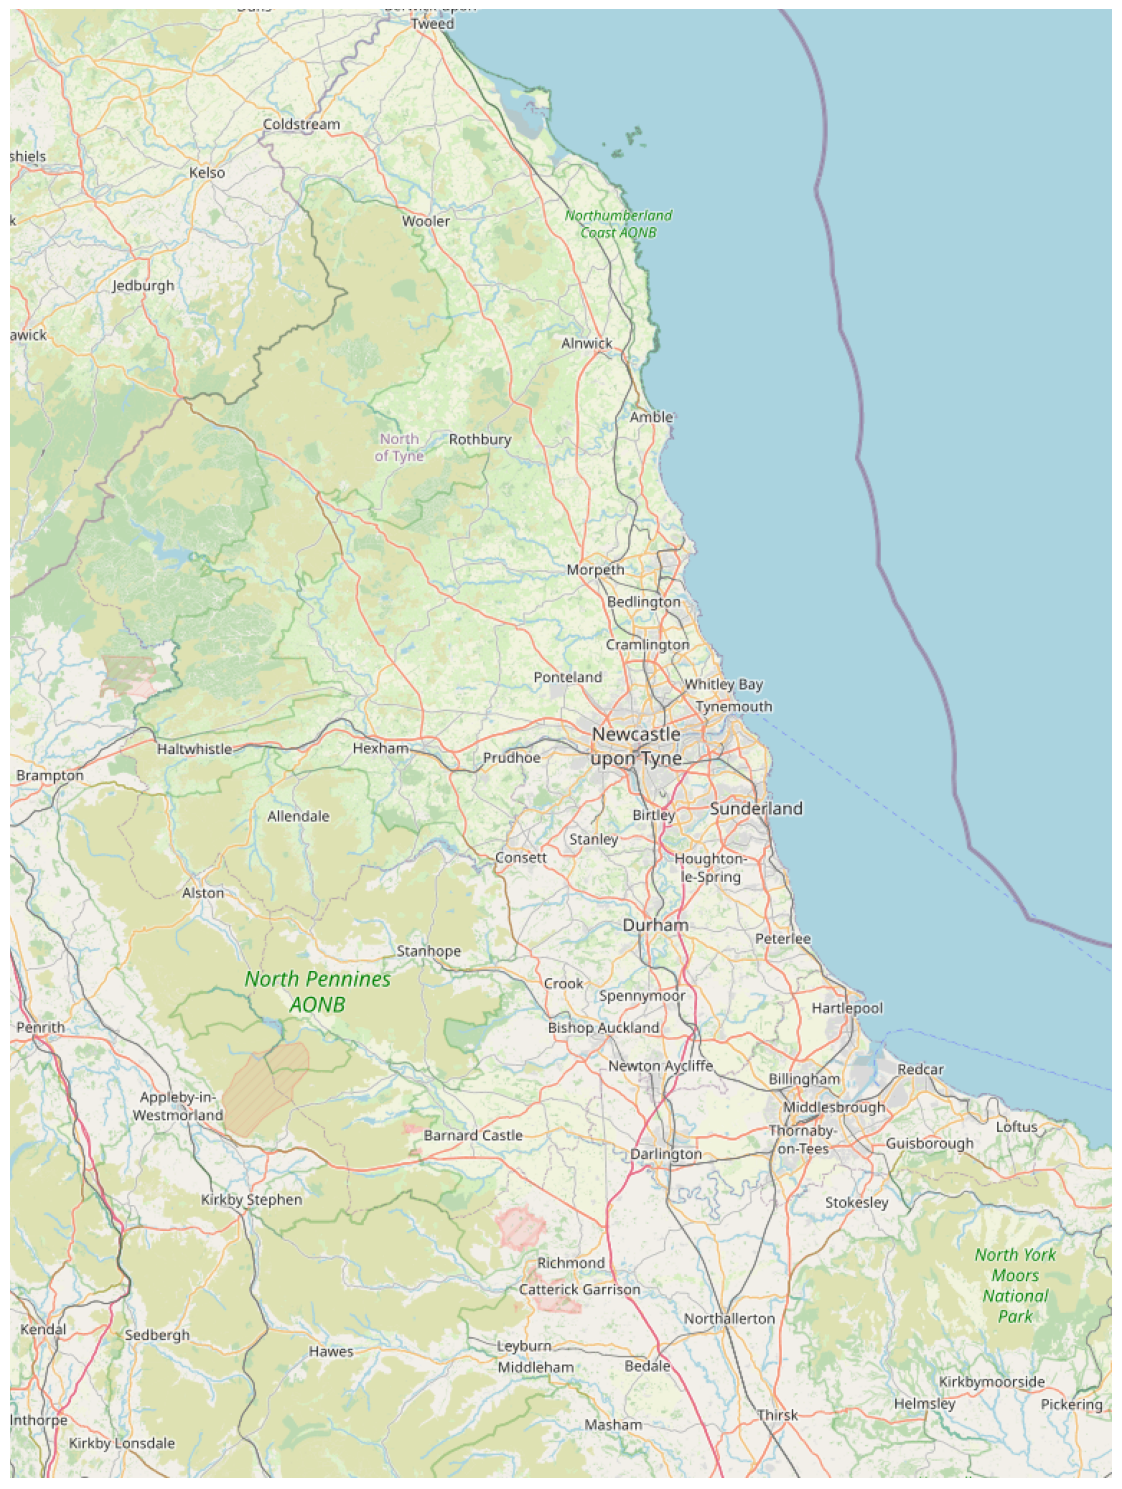

In [38]:
# sets the map area to the sensor extents
bbox = (
min(sensors_df['Sensor Centroid Latitude']),
    min(sensors_df['Sensor Centroid Longitude']),
    max(sensors_df['Sensor Centroid Latitude']),
    max(sensors_df['Sensor Centroid Longitude']),
)

# returns open street map image tile
map = smopy.Map(bbox, z=17)

# displays the image tile using matplotlib
ax = map.show_mpl(figsize=(15, 15))

brokers = sensors_df.groupby('z')

for i,row in sensors_df.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms=2, mew=2, c=sensors_df.raw_id, cmap='gray')

Lowered zoom level to keep map size reasonable. (z = 9)


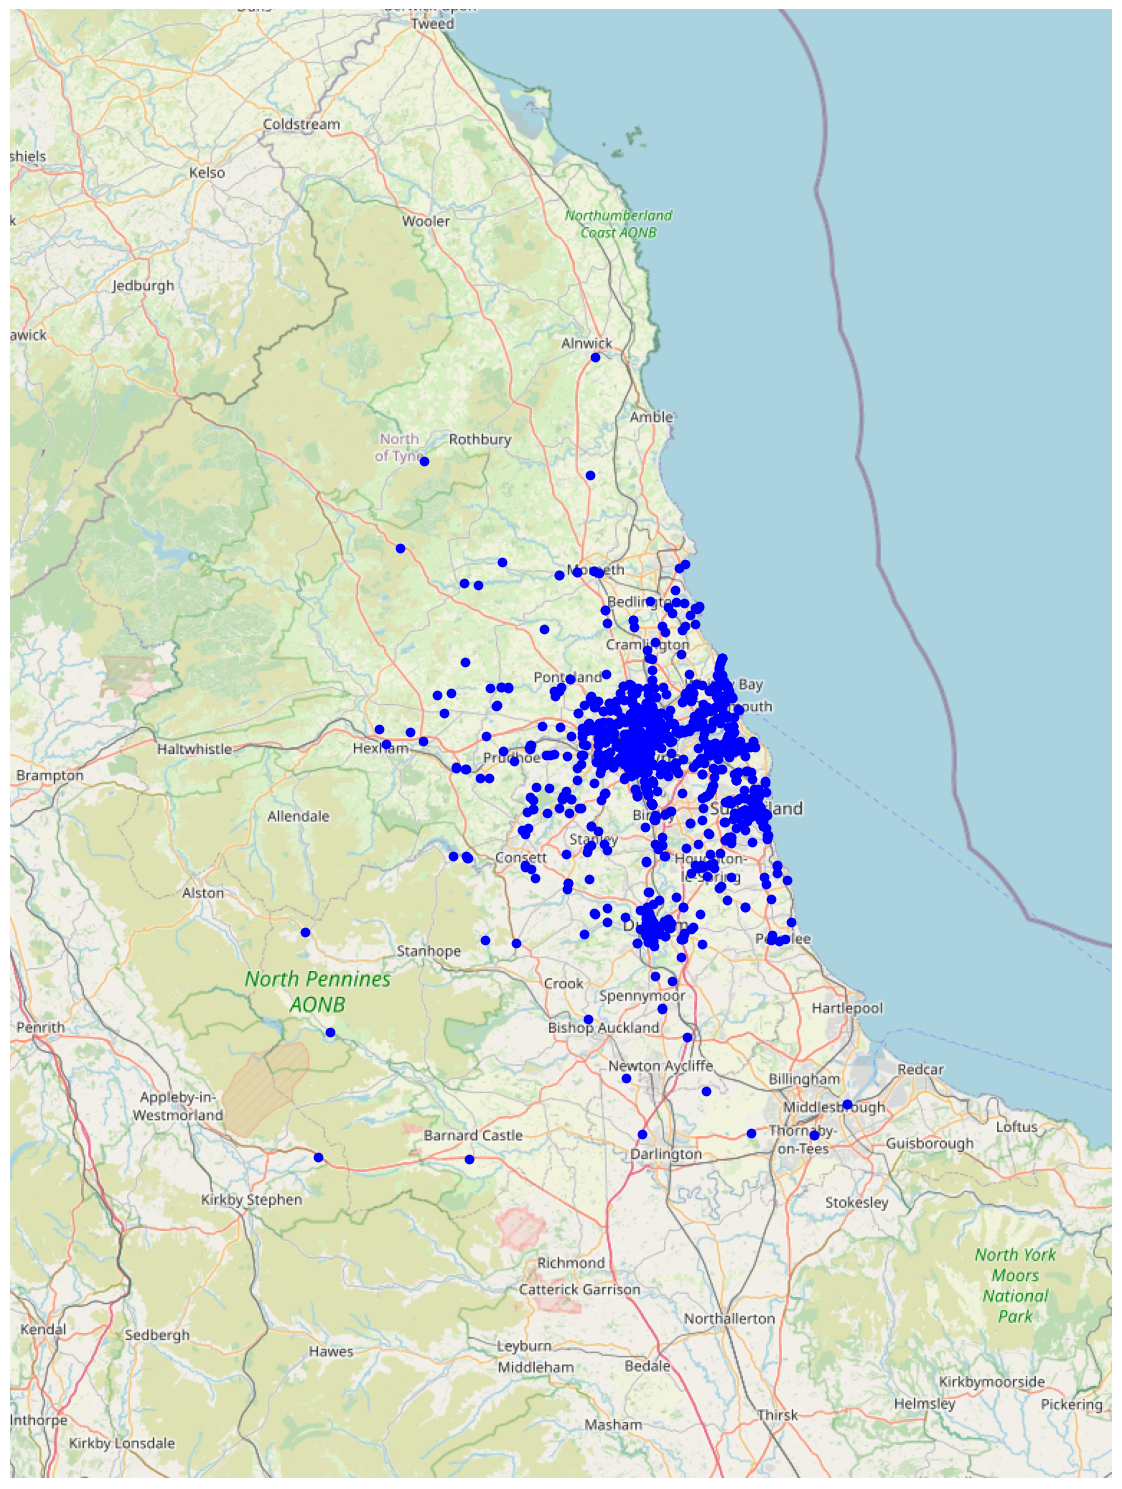

In [74]:
# sets the map area to the sensor extents
bbox = (
min(sensors_df['x']),
    min(sensors_df['y']),
    max(sensors_df['x']),
    max(sensors_df['y']),
)

# returns open street map image tile
map = smopy.Map(bbox, z=17)

# displays the image tile using matplotlib
ax = map.show_mpl(figsize=(15, 15))

for i,row in sensors_df.iterrows():
    x, y = map.to_pixels(row['x'], row['y'])
    broker = row['broker_name']
    ax.plot(x, y, 'ob')

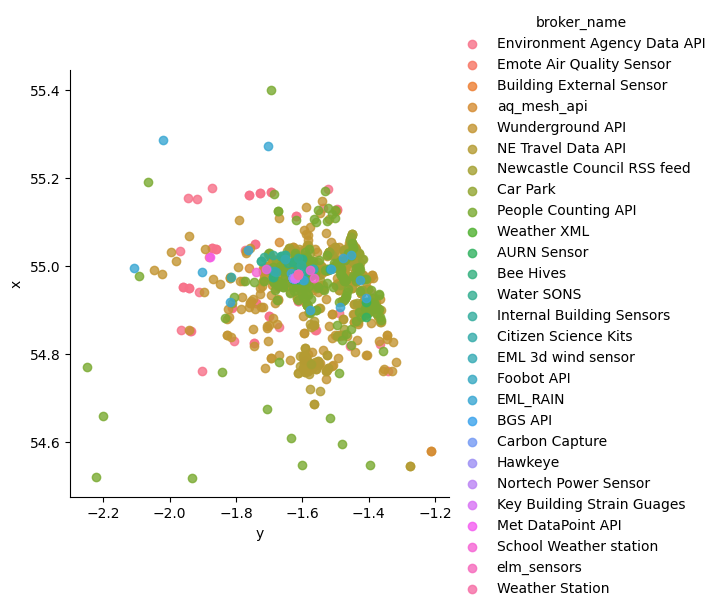

In [75]:
import seaborn as sns

sns.lmplot(x='y', y='x', data=sensors_df, hue='broker_name', fit_reg=False)